<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/Plan_Fakt_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
from google.colab import files
uploaded = files.upload()

Saving DS.xlsx to DS (1).xlsx


In [9]:
df = pd.read_excel('DS.xlsx')
print(df.head(3))

        Data  Val_plan  Val_fact  Tovar_plan  Tovar_fact  Tovar_nesvar  \
0 2022-11-01   2050.42    1752.1     2064.89      2014.5        1063.0   
1 2022-12-01   1930.83    1623.1     1914.89      1690.9        1000.0   
2 2023-01-01   1961.90    1683.9     1938.42      1788.0        1251.4   

   Tovar_svar  Transneft  Sborka_chel  Svarka_chel  
0       951.5          0          507          569  
1       690.9          0          430          461  
2       536.6          0          362          401  


In [10]:
df.drop('Data', axis=1, inplace=True)
print(df.head(3))

   Val_plan  Val_fact  Tovar_plan  Tovar_fact  Tovar_nesvar  Tovar_svar  \
0   2050.42    1752.1     2064.89      2014.5        1063.0       951.5   
1   1930.83    1623.1     1914.89      1690.9        1000.0       690.9   
2   1961.90    1683.9     1938.42      1788.0        1251.4       536.6   

   Transneft  Sborka_chel  Svarka_chel  
0          0          507          569  
1          0          430          461  
2          0          362          401  


In [11]:
print(df.describe())

          Val_plan     Val_fact   Tovar_plan   Tovar_fact  Tovar_nesvar  \
count    23.000000    23.000000    23.000000    23.000000     23.000000   
mean   1836.574783  1690.156522  1870.546522  1710.069565    981.943478   
std     438.815907   284.377451   391.028151   293.600998    253.003401   
min     616.420000  1034.300000   699.960000   867.200000    282.300000   
25%    1735.480000  1597.600000  1765.370000  1631.350000    869.750000   
50%    1944.000000  1752.100000  2001.990000  1756.500000   1000.000000   
75%    2061.095000  1828.750000  2115.780000  1915.700000   1156.550000   
max    2553.920000  2237.900000  2407.000000  2078.300000   1406.100000   

        Tovar_svar  Transneft  Sborka_chel  Svarka_chel  
count    23.000000  23.000000    23.000000    23.000000  
mean    728.126087   0.304348   421.652174   468.000000  
std     150.774917   0.470472    44.205726    55.762483  
min     412.400000   0.000000   357.000000   385.000000  
25%     623.500000   0.000000   39

In [12]:
df.shape

(23, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Val_plan      23 non-null     float64
 1   Val_fact      23 non-null     float64
 2   Tovar_plan    23 non-null     float64
 3   Tovar_fact    23 non-null     float64
 4   Tovar_nesvar  23 non-null     float64
 5   Tovar_svar    23 non-null     float64
 6   Transneft     23 non-null     int64  
 7   Sborka_chel   23 non-null     int64  
 8   Svarka_chel   23 non-null     int64  
dtypes: float64(6), int64(3)
memory usage: 1.7 KB


<Axes: ylabel='Frequency'>

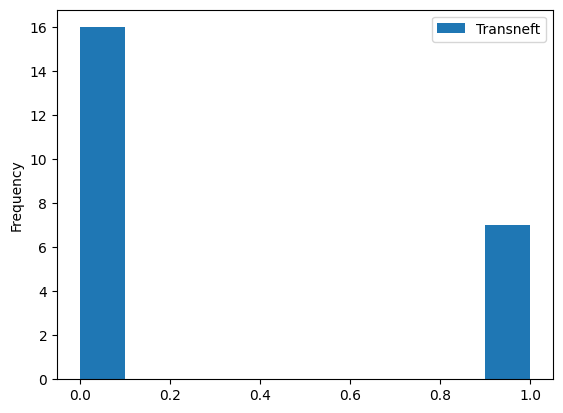

In [22]:
df[(df['Tovar_svar']>1) & (df['Tovar_svar']<3000)][['Transneft']].plot(kind='hist')

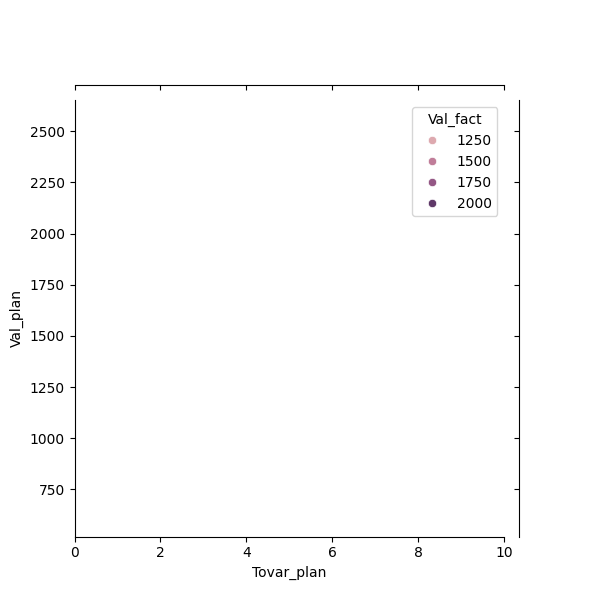

In [27]:
df_mat = df[(df['Val_plan']>0) & (df['Val_fact']>0)]
sns.jointplot(x='Tovar_plan', y='Val_plan', hue='Val_fact', data=df_mat[:5000], kind='scatter') # график совместного распределения по двум переменным
plt.xlim(0, 10) # Ограничим ось Х диапазоном (0, 10)
plt.show() # Показать построенный график

In [28]:
data = df[df.columns[:-1]]
data = data.apply(lambda x: (x - x.mean()) / x.std())

In [29]:
X = data.drop('Tovar_fact', axis=1).to_numpy()
Y = data['Tovar_fact'].to_numpy()


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20, 7)
(3, 7)
(20,)
(3,)


In [31]:
w_num = X_train.shape[1]
net = torch.nn.Sequential(torch.nn.Linear(w_num, 1))

torch.nn.init.normal_(net[0].weigt, mean=0, std=0.1)
torch.nn.init.constant_(net[0].baias, val=0)

num_epochs = 5
for epoch in range(num_epochs):
    for x, y, in train_iter:
        pass

AttributeError: 'Linear' object has no attribute 'weigt'